<a href="https://colab.research.google.com/github/mujtaba86/proje/blob/main/LAB_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 9 Feature Selection

# Dr Mohamed Ihmeida

# 23rd July 2025


In [ ]:
# Before you start this lab, make sure you have uploaded the three csv files to your notebook.
# The csv files (datasets) are in the lab folder.



1.   What is Feature Selection?
2.   Why we need Feature Selection?




In [ ]:
# Add your answer here or create new text cell for that



3.  What are the benefits of Feature Selection?
4.  What are the methods of Feature Selection?



In [ ]:
# Add your answer ere

5. What are the common method of feature selection?

In [ ]:
# Add your answer here


In [ ]:
## The implementation without Feature Selection

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load and Preprocess Data

# Load the dataset from the uploaded file
df = pd.read_csv('int.csv')
df.describe()
df.info()

# Drop the session_id as it is an identifier and not a predictive feature
df = df.drop('session_id', axis=1)

# One-hot encode categorical features. This converts categories into a numerical format.
# drop_first=True helps avoid multicollinearity.
df_encoded = pd.get_dummies(df, columns=['protocol_type', 'encryption_used', 'browser_type'], drop_first=True)

# Separate features (X) from the target variable (y)
X = df_encoded.drop('attack_detected', axis=1)
y = df_encoded['attack_detected']

# Split data into training and testing sets (70% train, 30% test)
# stratify=y ensures the proportion of attacks is the same in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale numerical features for KNN
# KNN is sensitive to the scale of data, so we scale it.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train and Evaluate K-Nearest Neighbors (KNN)

print("--- Training K-Nearest Neighbors (KNN) ---")
# Initialize the classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the scaled training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_knn = knn.predict(X_test_scaled)

# Calculate and print the F1 score
f1_knn = f1_score(y_test, y_pred_knn)
print(f"\nF1 Score (KNN): {f1_knn:.4f}")

# Print a detailed classification report
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))


# Train and Evaluate Decision Tree

print("\n--- Training Decision Tree Classifier ---")
# Initialize the classifier
# random_state=42 ensures the results are reproducible
dt = DecisionTreeClassifier(random_state=42)

# Train the model on the original (unscaled) training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt.predict(X_test)

# Calculate and print the F1 score
f1_dt = f1_score(y_test, y_pred_dt)
print(f"\nF1 Score (Decision Tree): {f1_dt:.4f}")

# Print a detailed classification report
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB
--- Training K-Nearest Neighbors (KNN) ---

F1 Score (KNN): 0.7296

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.76    

In [ ]:
## ## The implementation with Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Load and Preprocess Data

# Load the dataset from the uploaded file
df = pd.read_csv('Cybersecurity Intrusion Detection.csv')

# Drop the session_id as it is an identifier and not a predictive feature
df = df.drop('session_id', axis=1)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['protocol_type', 'encryption_used', 'browser_type'], drop_first=True)

# Separate features (X) from the target variable (y)
X = df_encoded.drop('attack_detected', axis=1)
y = df_encoded['attack_detected']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Apply Feature Selection

# We will select the top 10 features using the chi2 score function.
k_best_count = 9
selector = SelectKBest(score_func=chi2, k=k_best_count)

# Fit the selector to the training data and transform it
X_train_kbest = selector.fit_transform(X_train, y_train)

# Transform the test data using the same fitted selector
X_test_kbest = selector.transform(X_test)

# Get the names of the selected features for reference
selected_features_mask = selector.get_support()
selected_features_names = X_train.columns[selected_features_mask]
print(f"Selected the top {k_best_count} features: {list(selected_features_names)}\n")


# Scale Selected Features for KNN

# KNN is sensitive to the scale of data, so we scale the selected features.
scaler = StandardScaler()
X_train_kbest_scaled = scaler.fit_transform(X_train_kbest)
X_test_kbest_scaled = scaler.transform(X_test_kbest)


# Train and Evaluate K-Nearest Neighbors (KNN) on Selected Features

print("--- Training K-Nearest Neighbors (KNN) on Selected Features ---")
# Initialize the classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the selected and scaled training data
knn.fit(X_train_kbest_scaled, y_train)

# Make predictions on the selected and scaled test data
y_pred_knn = knn.predict(X_test_kbest_scaled)

# Calculate and print the F1 score
f1_knn = f1_score(y_test, y_pred_knn)
print(f"\nF1 Score (KNN with Feature Selection): {f1_knn:.4f}")

# Print a detailed classification report
print("\nClassification Report (KNN with Feature Selection):")
print(classification_report(y_test, y_pred_knn))


# Train and Evaluate Decision Tree on Selected Features

print("\n--- Training Decision Tree on Selected Features ---")
# Initialize the classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the model on the selected (but unscaled) training data
dt.fit(X_train_kbest, y_train)

# Make predictions on the selected test data
y_pred_dt = dt.predict(X_test_kbest)

# Calculate and print the F1 score
f1_dt = f1_score(y_test, y_pred_dt)
print(f"\nF1 Score (Decision Tree with Feature Selection): {f1_dt:.4f}")

# Print a detailed classification report
print("\nClassification Report (Decision Tree with Feature Selection):")
print(classification_report(y_test, y_pred_dt))

Selected the top 9 features: ['network_packet_size', 'login_attempts', 'session_duration', 'ip_reputation_score', 'failed_logins', 'unusual_time_access', 'browser_type_Edge', 'browser_type_Firefox', 'browser_type_Unknown']

--- Training K-Nearest Neighbors (KNN) on Selected Features ---

F1 Score (KNN with Feature Selection): 0.7937

Classification Report (KNN with Feature Selection):
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1582
           1       0.91      0.71      0.79      1280

    accuracy                           0.84      2862
   macro avg       0.85      0.82      0.83      2862
weighted avg       0.85      0.84      0.83      2862


--- Training Decision Tree on Selected Features ---

F1 Score (Decision Tree with Feature Selection): 0.8008

Classification Report (Decision Tree with Feature Selection):
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1582
   

6. Comapre the F1 score for KNN and Decision Tree with and without feature selection.

7. Can you draw `bar-chat` for each F1 score?

8. Try to change k_best_count and observe F1-Score

9. Consider the number of features with F1-Score. Draw the realtionship between k_best_count and F1-Score.

In [ ]:
## Add your answer here

In [ ]:
## ## The implementation without Feature Selection with NSL-KDD dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load Your Provided Train and Test Data
df_train = pd.read_csv('int.csv')
df_test = pd.read_csv('kdd_test.csv')
# print("Successfully loaded kdd_train.csv and kdd_test.csv.")
df.describe()
df.info()

# Preprocess Data Consistently

# Store original lengths to split them back later
train_len = len(df_train)

# Combine for consistent encoding
df = pd.concat([df_train, df_test], ignore_index=True)

# Use LabelEncoder for categorical features
# This is simpler and sufficient for tree-based models
for col in ['protocol_type', 'service', 'flag']:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Create a binary target variable: 1 for any attack, 0 for normal
df['attack'] = df['labels'].apply(lambda x: 0 if x == 'normal' else 1)
df = df.drop('labels', axis=1)

# Separate features from target
X = df.drop('attack', axis=1)
y = df['attack']

# Inject Noise Features
# We add 60 columns of random noise to simulate a high-dimensional environment
num_noise_features = 60
for i in range(num_noise_features):
    noise = np.random.rand(len(X))
    X[f'noise_{i}'] = noise

print(f"Total features after adding noise: {X.shape[1]}")

# Separate back into Training and Testing Sets
X_train = X.iloc[:train_len]
X_test = X.iloc[train_len:]
y_train = y.iloc[:train_len]
y_test = y.iloc[train_len:]


# Scale Data and Train Models

# Scale data for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors
print("\n--- Training K-Nearest Neighbors (Without Feature Selection) ---")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
f1_knn = f1_score(y_test, y_pred_knn)
print(f"F1 Score (KNN on noisy data): {f1_knn:.4f}")
print(classification_report(y_test, y_pred_knn))

# Decision Tree
print("\n--- Training Decision Tree (Without Feature Selection) ---")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train) # Use unscaled data for tree
y_pred_dt = dt.predict(X_test)
f1_dt = f1_score(y_test, y_pred_dt)
print(f"F1 Score (Decision Tree on noisy data): {f1_dt:.4f}")
print(classification_report(y_test, y_pred_dt))


FileNotFoundError: [Errno 2] No such file or directory: 'kdd_test.csv'

In [ ]:
## ## ## The implementation with Feature Selection with NSL-KDD dataset

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
# Load Your Provided Train and Test Data
df_train = pd.read_csv('kdd_train.csv')  # load the train data here
df_test = pd.read_csv('kdd_test.csv')  # load the test data here
print("Successfully loaded kdd_train.csv and kdd_test.csv.")


# Preprocess Data Consistently
# We process train and test sets separately to avoid data leakage during encoding,
# but for simplicity with LabelEncoder, we'll fit on train and transform both.

# Create a binary target variable: 1 for any attack, 0 for normal
y_train = df_train['labels'].apply(lambda x: 0 if x == 'normal' else 1)
y_test = df_test['labels'].apply(lambda x: 0 if x == 'normal' else 1)

X_train = df_train.drop('labels', axis=1)
X_test = df_test.drop('labels', axis=1)

# Use LabelEncoder for categorical features, fitting only on training data
for col in ['protocol_type', 'service', 'flag']:
    if col in X_train.columns:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        # Handle new categories in test data that were not in train data
        X_test[col] = X_test[col].map(lambda s: '<unknown>' if s not in le.classes_ else s)
        le.classes_ = np.append(le.classes_, '<unknown>')
        X_test[col] = le.transform(X_test[col])


# print(f"Total features before selection: {X_train.shape[1]}")

# Apply Feature Selection CORRECTLY
# We will select the 30 best features to filter out the noise.
k_best_count = 30
selector = SelectKBest(score_func=f_classif, k=k_best_count)

# Fit the selector ONLY on the training data
selector.fit(X_train, y_train)

# Transform both the training and testing data using the fitted selector
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print(f"Features after selection: {X_train_selected.shape[1]}")


# Scale Data and Train Models

# Scale the selected data for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# K-Nearest Neighbors
print("\n--- Training K-Nearest Neighbors (With Feature Selection) ---")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
f1_knn = f1_score(y_test, y_pred_knn)
print(f"F1 Score (KNN on cleaned data): {f1_knn:.4f}")
print(classification_report(y_test, y_pred_knn))

# Decision Tree
print("\n--- Training Decision Tree (With Feature Selection) ---")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_selected, y_train) # Use unscaled, selected data for tree
y_pred_dt = dt.predict(X_test_selected)
f1_dt = f1_score(y_test, y_pred_dt)
print(f"F1 Score (Decision Tree on cleaned data): {f1_dt:.4f}")
print(classification_report(y_test, y_pred_dt))

Successfully loaded kdd_train.csv and kdd_test.csv.


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Features after selection: 15

--- Training K-Nearest Neighbors (With Feature Selection) ---
F1 Score (KNN on cleaned data): 0.9339
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11245
           1       0.99      0.89      0.93     11299

    accuracy                           0.94     22544
   macro avg       0.94      0.94      0.94     22544
weighted avg       0.94      0.94      0.94     22544


--- Training Decision Tree (With Feature Selection) ---
F1 Score (Decision Tree on cleaned data): 0.9309
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11245
           1       0.99      0.88      0.93     11299

    accuracy                           0.93     22544
   macro avg       0.94      0.93      0.93     22544
weighted avg       0.94      0.93      0.93     22544



10. Comapre the F1 score for KNN and Decision Tree with and without feature selection.

11. Can you draw `bar-chat` for each F1 score?

12. Try to change k_best_count and observe F1-Score

13. Consider the number of features with F1-Score. Draw the realtionship between k_best_count and F1-Score.

In [ ]:
# Add your answer here


14. if you could compute the time between the approaches with and without feature selection. This will very good!

15. Draw the bar-chart for both approaches times.

In [ ]:
#  Add your answer here

16. Can you summarise the benefits and challenges for feature selection from your experience? (just couple of sentences from your own words)

In [ ]:
# Add your answer here

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# 1. Create the selector to find the top 10 features
selector = SelectKBest(score_func=f_classif, k=10)

# 2. Fit it on training data to find the best features
selector.fit(X_train, y_train)

# 3. Transform the data to keep only the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

=== First few rows of the dataset ===
  session_id  network_packet_size protocol_type  login_attempts  \
0  SID_00001                  599           TCP               4   
1  SID_00002                  472           TCP               3   
2  SID_00003                  629           TCP               3   
3  SID_00004                  804           UDP               4   
4  SID_00005                  453           TCP               5   

   session_duration encryption_used  ip_reputation_score  failed_logins  \
0        492.983263             DES             0.606818              1   
1       1557.996461             DES             0.301569              0   
2         75.044262             DES             0.739164              2   
3        601.248835             DES             0.123267              0   
4        532.540888             AES             0.054874              1   

  browser_type  unusual_time_access  attack_detected  
0         Edge                    0                1 

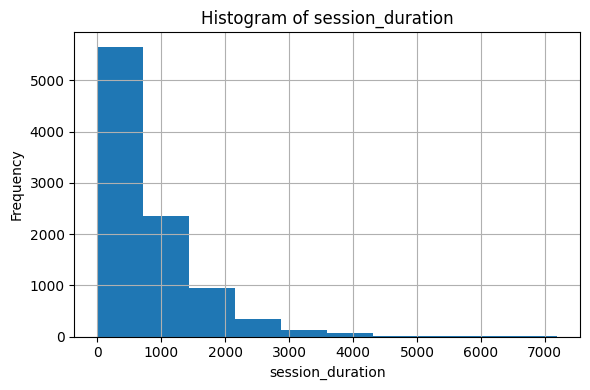

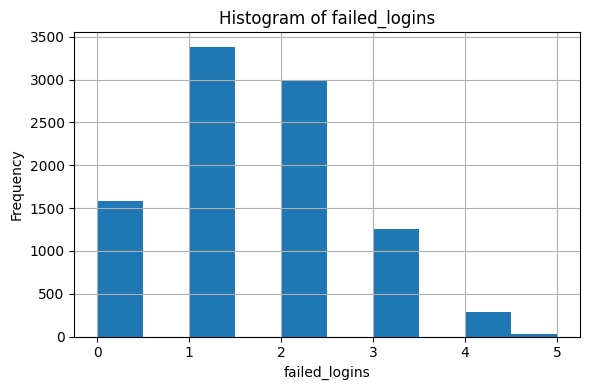

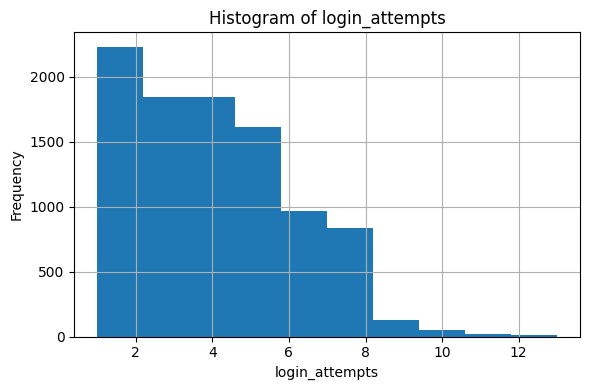

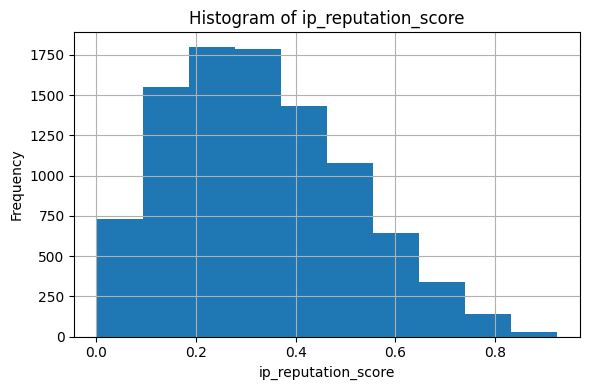

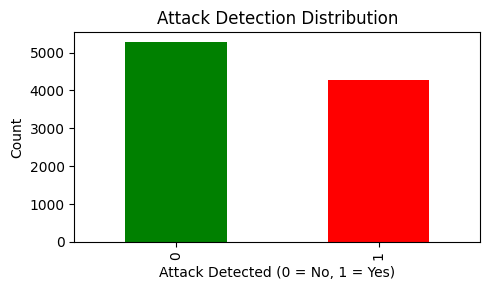

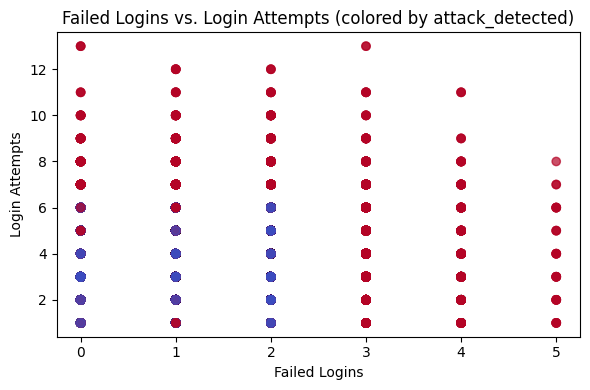


=== Precision, Recall, and F1-Score Values ===
      Metric  No Attack (0)  Attack (1)   Overall
0  Precision       0.639969    0.647910  0.643939
1     Recall       0.789827    0.465358  0.627593
2   F1-Score       0.707045    0.541667  0.624356


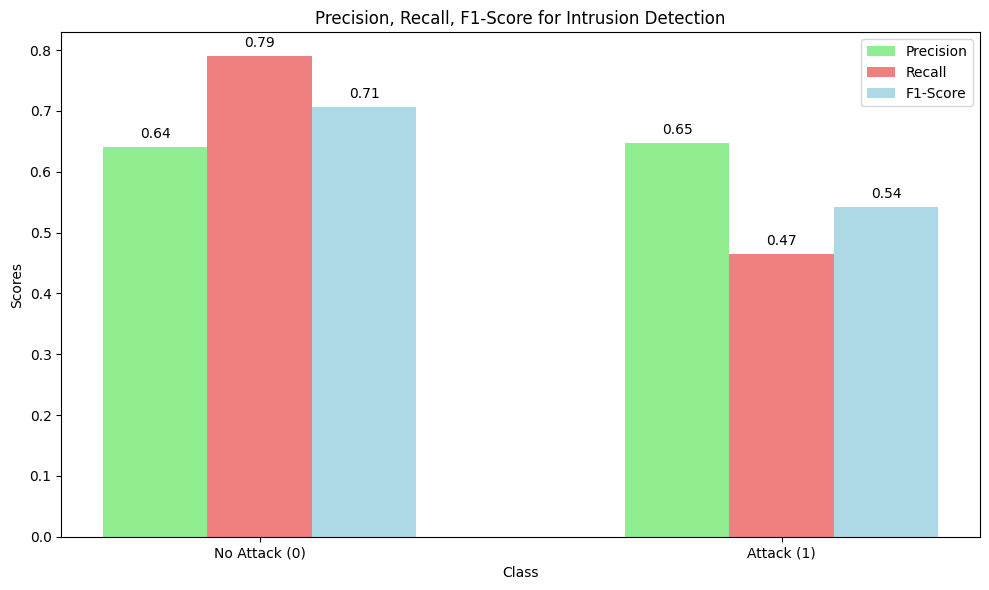

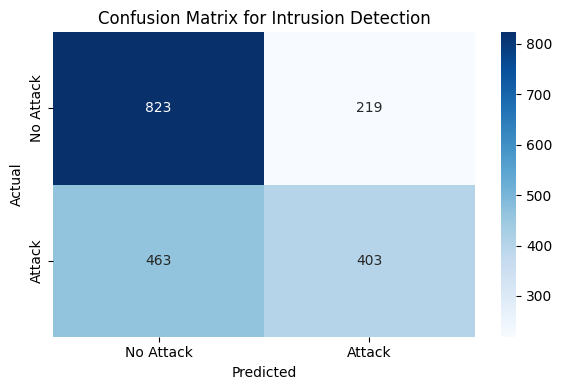

In [ ]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 2. Load the Cybersecurity Intrusion Detection dataset
df = pd.read_csv('int.csv')

# 3. Quick data exploration
# See first few rows to understand the dataset
print("=== First few rows of the dataset ===")
print(df.head())

# Inspect the structure of the dataset: column names, data types, and null counts
print("\n=== Dataset Structure ===")
df.info()

# Get summary statistics for numerical columns
print("\n=== Summary Statistics ===")
print(df.describe())

# Inspect the distribution of categorical columns (such as 'attack_detected')
print("\n=== Value counts for categorical columns ===")
print(df['attack_detected'].value_counts())

# 4. Visualize key numerical features
# Plot histograms for numerical columns
numerical_cols = ['session_duration', 'failed_logins', 'login_attempts', 'ip_reputation_score']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    df[col].hist(bins=10)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# 5. Visualize the distribution of the categorical feature 'attack_detected'
plt.figure(figsize=(5, 3))
df['attack_detected'].value_counts().plot(kind='bar', color=["green", "red"])
plt.title("Attack Detection Distribution")
plt.xlabel("Attack Detected (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 6. Scatter plot: Visualize the relationship between 'failed_logins' and 'login_attempts'
plt.figure(figsize=(6, 4))
plt.scatter(df['failed_logins'], df['login_attempts'], c=df['attack_detected'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Failed Logins')
plt.ylabel('Login Attempts')
plt.title('Failed Logins vs. Login Attempts (colored by attack_detected)')
plt.tight_layout()
plt.show()

# 7. Pre-process & split the data
X = df[['session_duration', 'failed_logins', 'login_attempts', 'ip_reputation_score']]  # Example features
y = df['attack_detected']  # Target variable: 0 = No Attack, 1 = Attack

# Split data into training and testing sets (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 9. Evaluate the performance
y_pred = knn.predict(X_test)

# Classification report to evaluate precision, recall, f1-score
report = classification_report(y_test, y_pred, output_dict=True)

# 10. Extract precision, recall, f1-score for each class and overall scores
precision = [report['0']['precision'], report['1']['precision']]
recall = [report['0']['recall'], report['1']['recall']]
f1_score = [report['0']['f1-score'], report['1']['f1-score']]

# Calculate overall precision, recall, and F1-score (average across both classes)
overall_precision = (precision[0] + precision[1]) / 2
overall_recall = (recall[0] + recall[1]) / 2
overall_f1_score = (f1_score[0] + f1_score[1]) / 2

# Display individual scores and overall scores
print("\n=== Precision, Recall, and F1-Score Values ===")
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'No Attack (0)': [precision[0], recall[0], f1_score[0]],
    'Attack (1)': [precision[1], recall[1], f1_score[1]],
    'Overall': [overall_precision, overall_recall, overall_f1_score]
})

# Display the table
print(metrics_df)

# Bar chart to visualize precision, recall, and F1-score in one plot
labels = ['No Attack (0)', 'Attack (1)']

# Set the positions for the bars (slightly offset for each metric)
x = range(len(labels))

# Create a single bar chart for Precision, Recall, and F1-Score
fig, ax = plt.subplots(figsize=(10, 6))

width = 0.2  # width of the bars
bars_precision = ax.bar([p - width for p in x], precision, width=width, label="Precision", color='lightgreen', align='center')
bars_recall = ax.bar(x, recall, width=width, label="Recall", color='lightcoral', align='center')
bars_f1 = ax.bar([p + width for p in x], f1_score, width=width, label="F1-Score", color='lightblue', align='center')

# Add value labels on top of each bar
for bar in bars_precision:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', color='black')

for bar in bars_recall:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', color='black')

for bar in bars_f1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', color='black')

# Set labels, title, and legends
ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, F1-Score for Intrusion Detection')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attack", "Attack"], yticklabels=["No Attack", "Attack"])
plt.title("Confusion Matrix for Intrusion Detection")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


=== First few rows of the dataset ===
  session_id  network_packet_size protocol_type  login_attempts  \
0  SID_00001                  599           TCP               4   
1  SID_00002                  472           TCP               3   
2  SID_00003                  629           TCP               3   
3  SID_00004                  804           UDP               4   
4  SID_00005                  453           TCP               5   

   session_duration encryption_used  ip_reputation_score  failed_logins  \
0        492.983263             DES             0.606818              1   
1       1557.996461             DES             0.301569              0   
2         75.044262             DES             0.739164              2   
3        601.248835             DES             0.123267              0   
4        532.540888             AES             0.054874              1   

  browser_type  unusual_time_access  attack_detected  
0         Edge                    0                1 

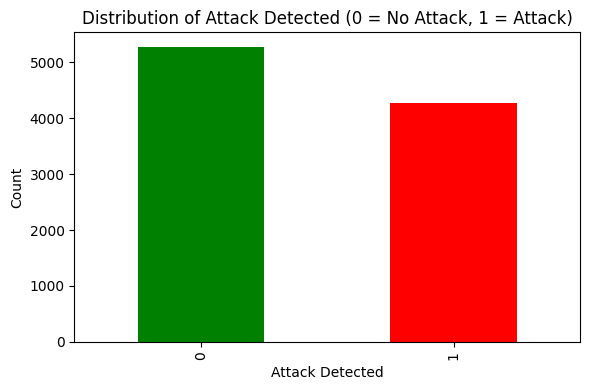

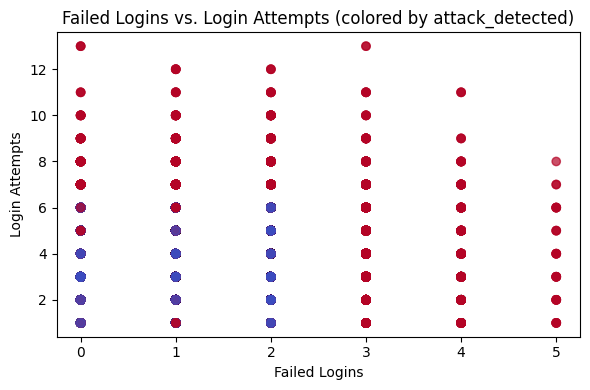

--- Training K-Nearest Neighbors (KNN) ---

F1 Score (KNN): 0.7296

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1582
           1       0.86      0.63      0.73      1280

    accuracy                           0.79      2862
   macro avg       0.81      0.78      0.78      2862
weighted avg       0.80      0.79      0.78      2862



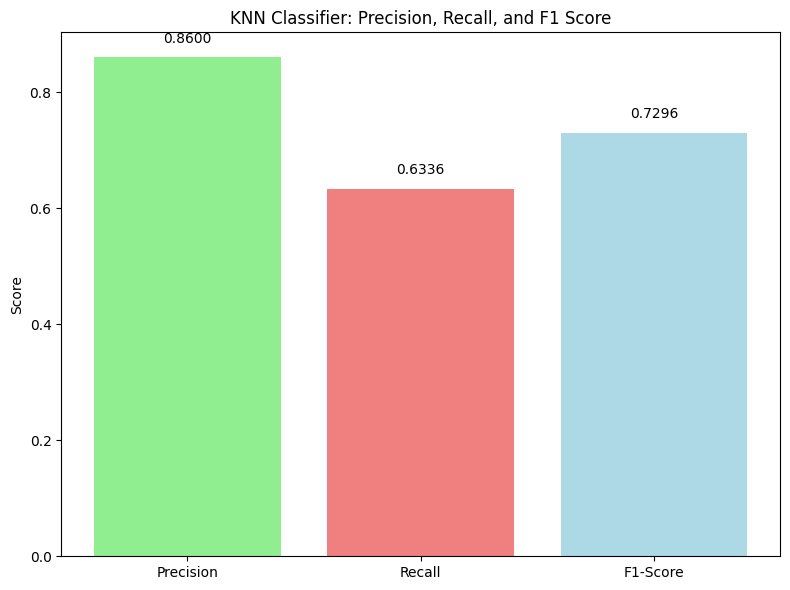

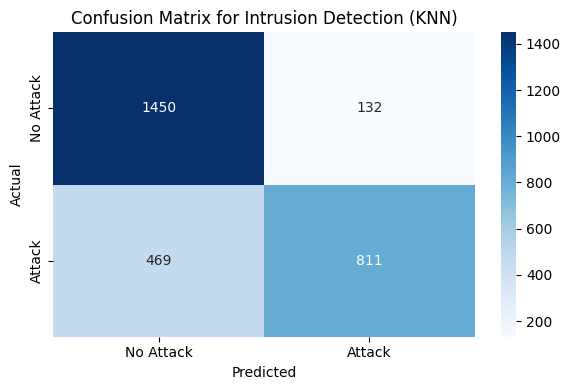

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the dataset from the uploaded file
df = pd.read_csv('int.csv')

# 1. Data Description
# Drop the session_id as it is an identifier and not a predictive feature


# Display the first few rows of the dataset
print("=== First few rows of the dataset ===")
print(df.head())

# Check data structure, missing values, and types
print("\n=== Dataset Structure ===")
df.info()

# Get summary statistics for numerical columns
print("\n=== Summary Statistics ===")
print(df.describe())

# Inspect the distribution of categorical columns (e.g., 'attack_detected')
print("\n=== Value counts for categorical columns ===")
print(df['attack_detected'].value_counts())

# Visualize the distribution of the target variable 'attack_detected'
plt.figure(figsize=(6, 4))
df['attack_detected'].value_counts().plot(kind='bar', color=["green", "red"])
plt.title("Distribution of Attack Detected (0 = No Attack, 1 = Attack)")
plt.xlabel("Attack Detected")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# 6. Scatter plot: Visualize the relationship between 'failed_logins' and 'login_attempts'
plt.figure(figsize=(6, 4))
plt.scatter(df['failed_logins'], df['login_attempts'], c=df['attack_detected'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Failed Logins')
plt.ylabel('Login Attempts')
plt.title('Failed Logins vs. Login Attempts (colored by attack_detected)')
plt.tight_layout()
plt.show()

# 2. Preprocess the Data
# One-hot encode categorical features. This converts categories into a numerical format.
df_encoded = pd.get_dummies(df, columns=['protocol_type', 'encryption_used', 'browser_type'], drop_first=True)

# Separate features (X) from the target variable (y)
X = df_encoded.drop('attack_detected', axis=1)
y = df_encoded['attack_detected']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



# 4. Train and Evaluate K-Nearest Neighbors (KNN)
print("--- Training K-Nearest Neighbors (KNN) ---")
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the scaled training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_knn = knn.predict(X_test_scaled)

# Calculate the F1 score, Precision, and Recall
f1_knn = f1_score(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn, output_dict=True)

precision_knn = report['1']['precision']  # Precision for Attack (1)
recall_knn = report['1']['recall']      # Recall for Attack (1)

# Print the F1 score and the classification report
print(f"\nF1 Score (KNN): {f1_knn:.4f}")
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

# 5. Bar Chart to visualize Precision, Recall, and F1-Score
metrics = [precision_knn, recall_knn, f1_knn]
metrics_labels = ['Precision', 'Recall', 'F1-Score']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics_labels, metrics, color=['lightgreen', 'lightcoral', 'lightblue'])

# Add the values on top of the bars
for i, value in enumerate(metrics):
    plt.text(i, value + 0.02, f"{value:.4f}", ha='center', va='bottom', color='black')

# Add titles and labels
plt.title('KNN Classifier: Precision, Recall, and F1 Score')
plt.ylabel('Score')
plt.tight_layout()

# Show the plot
plt.show()

# 6. Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_knn)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attack", "Attack"], yticklabels=["No Attack", "Attack"])
plt.title("Confusion Matrix for Intrusion Detection (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


=== First few rows of the dataset ===
  session_id  network_packet_size protocol_type  login_attempts  \
0  SID_00001                  599           TCP               4   
1  SID_00002                  472           TCP               3   
2  SID_00003                  629           TCP               3   
3  SID_00004                  804           UDP               4   
4  SID_00005                  453           TCP               5   

   session_duration encryption_used  ip_reputation_score  failed_logins  \
0        492.983263             DES             0.606818              1   
1       1557.996461             DES             0.301569              0   
2         75.044262             DES             0.739164              2   
3        601.248835             DES             0.123267              0   
4        532.540888             AES             0.054874              1   

  browser_type  unusual_time_access  attack_detected  
0         Edge                    0                1 

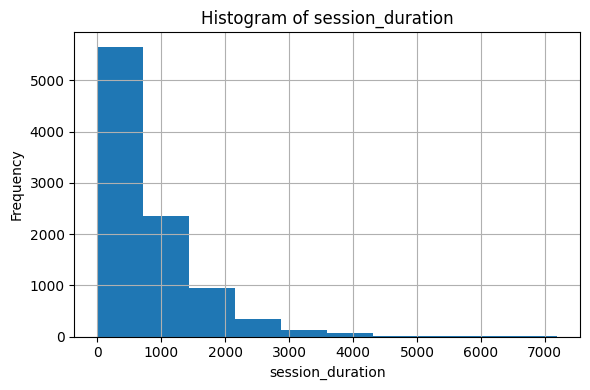

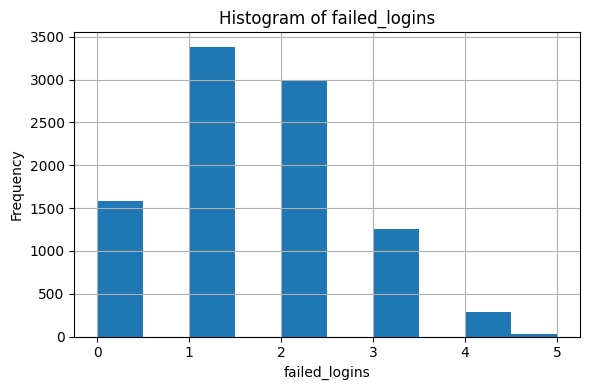

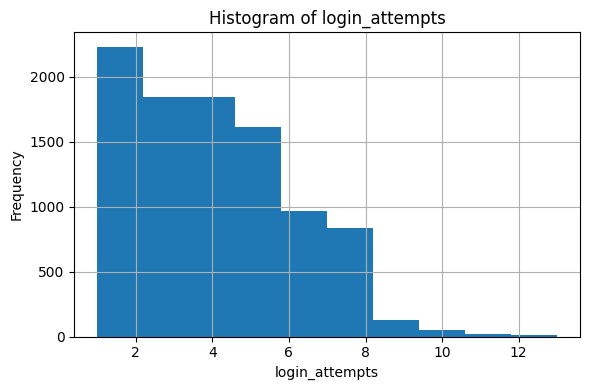

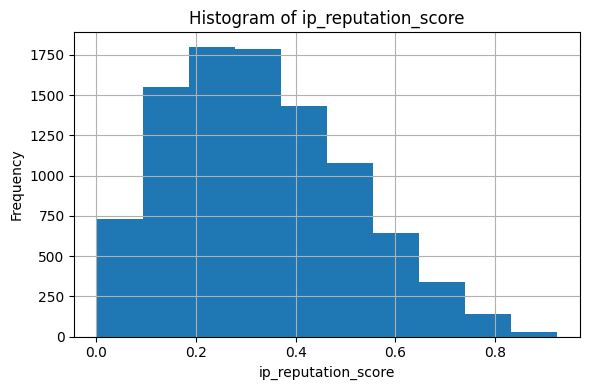


=== Precision, Recall, and F1-Score Values ===
      Metric  No Attack (0)  Attack (1)   Overall
0  Precision       0.639969    0.647910  0.643939
1     Recall       0.789827    0.465358  0.627593
2   F1-Score       0.707045    0.541667  0.624356


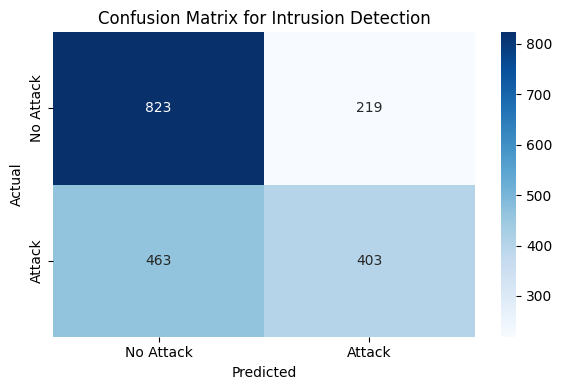

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 2. Load the Cybersecurity Intrusion Detection dataset
df = pd.read_csv('int.csv')

# 3. Quick data exploration
# See first few rows to understand the dataset
print("=== First few rows of the dataset ===")
print(df.head())

# Inspect the structure of the dataset: column names, data types, and null counts
print("\n=== Dataset Structure ===")
df.info()

# Get summary statistics for numerical columns
print("\n=== Summary Statistics ===")
print(df.describe())

# Inspect the distribution of categorical columns (such as 'attack_detected')
print("\n=== Value counts for categorical columns ===")
print(df['attack_detected'].value_counts())
# Plot histograms for numerical columns
numerical_cols = ['session_duration', 'failed_logins', 'login_attempts', 'ip_reputation_score']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    df[col].hist(bins=10)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


# . Pre-process & split the data
X = df[['failed_logins', 'ip_reputation_score']]  # Example features
y = df['attack_detected']  # Target variable: 0 = No Attack, 1 = Attack

# Split data into training and testing sets (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# . Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# . Evaluate the performance
y_pred = knn.predict(X_test)

# Classification report to evaluate precision, recall, f1-score
report = classification_report(y_test, y_pred, output_dict=True)

# . Extract precision, recall, f1-score for each class and overall scores
precision = [report['0']['precision'], report['1']['precision']]
recall = [report['0']['recall'], report['1']['recall']]
f1_score = [report['0']['f1-score'], report['1']['f1-score']]

# Calculate overall precision, recall, and F1-score (average across both classes)
overall_precision = (precision[0] + precision[1]) / 2
overall_recall = (recall[0] + recall[1]) / 2
overall_f1_score = (f1_score[0] + f1_score[1]) / 2

# Display individual scores and overall scores
print("\n=== Precision, Recall, and F1-Score Values ===")
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'No Attack (0)': [precision[0], recall[0], f1_score[0]],
    'Attack (1)': [precision[1], recall[1], f1_score[1]],
    'Overall': [overall_precision, overall_recall, overall_f1_score]
})

# Display the table
print(metrics_df)

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attack", "Attack"], yticklabels=["No Attack", "Attack"])
plt.title("Confusion Matrix for Intrusion Detection")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()